In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
ratings = pd.read_csv("API Exported Data.csv")
c_s = ratings.loc[ratings["Function"] == "Consumer Satisfaction"]

valueofcare = pd.read_csv("Payment_and_value_of_care_-_Hospital_CLEAN.csv")

dbdf = pd.read_csv("joint_only_2017_chrgs.csv")

zips = pd.read_csv("All Zip Data.csv")

dbdf = pd.merge(dbdf, c_s, on="Provider ID")
dbdf = pd.merge(dbdf, zips, on="Zipcode")

dbdf.to_csv("dbdf.csv")


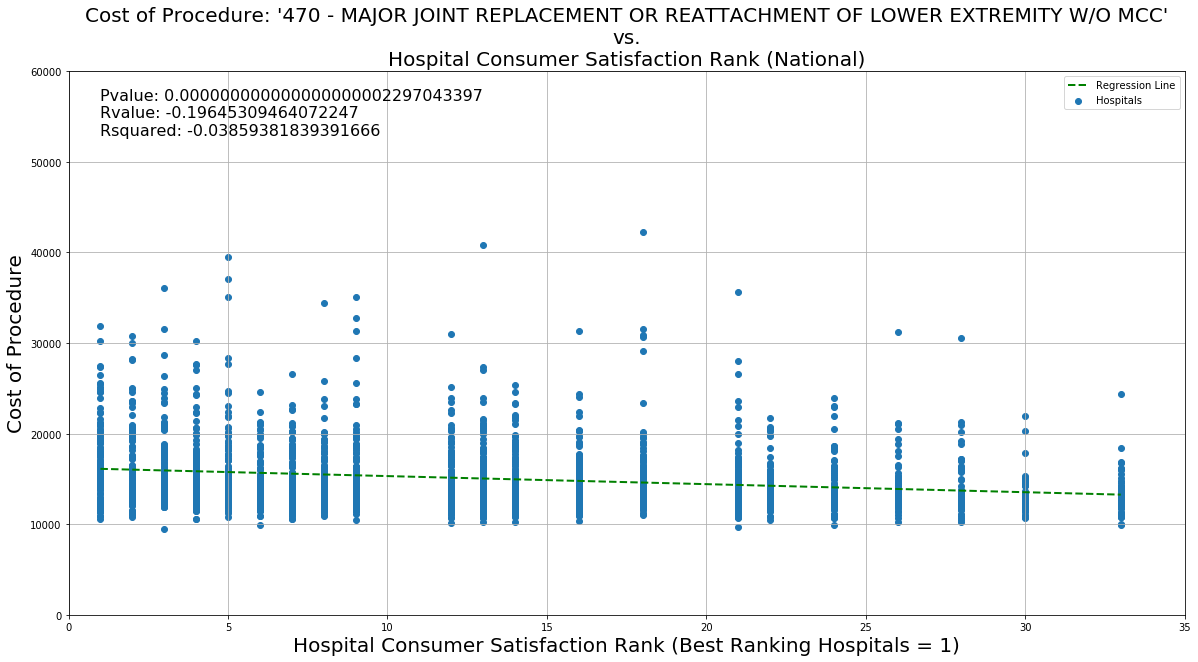

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
slope, inter, rvalue, pvalue, std = stats.linregress(dbdf["Rank"], dbdf["Average Total Payments"])
yvals = np.linspace(dbdf["Rank"].min(), dbdf["Rank"].max())
fit = slope * yvals + inter
ax.set_ylim(0, 60000)
ax.set_xlim(0, 35)
ax.plot(yvals, fit, color="green", linewidth=2, linestyle="--")
ax.scatter(dbdf["Rank"], dbdf["Average Total Payments"])
ax.set_xlabel("Hospital Consumer Satisfaction Rank (Best Ranking Hospitals = 1)", fontsize=20)
ax.set_ylabel("Cost of Procedure", fontsize=20)
plt.legend(["Regression Line", "Hospitals"])
pvalue = '{0:.30f}'.format(pvalue)
plt.title("Cost of Procedure: '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC'\nvs.\nHospital Consumer Satisfaction Rank (National)", fontsize=20)
plt.text(1, 53000, "Pvalue: " + str(pvalue) + "\nRvalue: " + str(rvalue) + "\nRsquared: -" + str(rvalue**2), fontsize=16)
plt.grid()
plt.savefig("Rank vs joint cost.png")